## Setting up and importing

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -Uqq torch

In [ ]:
!pip install -Uqq transformers[sentencepiece] transformers[torch] datasets evaluate ohmeow-blurr nbdev

In [ ]:
import pandas as pd
import os
import json

In [ ]:
import torch
import transformers
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

In [ ]:
%cd /content/drive/MyDrive/datasets/NLP/

/content/drive/MyDrive/datasets/NLP


In [ ]:
!ls

dataloaders			    papersWithCode_data_singleLabel.csv
models				    papersWithCode_processed.csv
papersWithCode_data.csv		    task_types_encoded.json
papersWithCode_data_multiLabel.csv


In [ ]:
df = pd.read_csv("papersWithCode_data_singleLabel.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17861 entries, 0 to 17860
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          17861 non-null  object
 1   abstract       17861 non-null  object
 2   datasets_used  17861 non-null  object
 3   methods        17861 non-null  object
 4   tasks          17861 non-null  object
 5   task           17861 non-null  object
dtypes: object(6)
memory usage: 837.4+ KB


In [ ]:
df.head()

,title,abstract,datasets_used,methods,tasks,task
0,A Lumen Segmentation Method in Ureteroscopy Images based on a Deep Residual U-Net architecture,"Ureteroscopy is becoming the first surgical treatment option for the majority of urinary affections. This procedure is performed using an endoscope which provides the surgeon with the visual information necessary to navigate inside the urinary tract. Having in mind the development of surgical assistance systems, that could enhance the performance of surgeon, the task of lumen segmentation is a fundamental part since this is the visual reference which marks the path that the endoscope should follow. This is something that has not been analyzed in ureteroscopy data before. However, this task...",['Add Datasets'],"['Concatenated Skip Connection', 'Convolution', 'Max Pooling', 'ReLU', 'U-Net']",['Navigate'],Navigate
1,Classification without (Proper) Representation: Political Heterogeneity in Social Media and Its Implications for Classification and Behavioral Analysis,"Reddit is home to a broad spectrum of political activity, and users signal their political affiliations in multiple ways—from self-declarations to community participation. Frequently, computational studies have treated political users as a single bloc, both in developing models to infer political leaning and in studying political behavior. Here, we test this assumption of political users and show that commonly-used political-inference models do not generalize, indicating heterogeneous types of political users. The models remain imprecise at best for most users, regardless of which sources ...",['Add Datasets'],"['Absolute Position Encodings', 'Adam', 'BPE', 'Dense Connections', 'Dropout', 'Label Smoothing', 'Layer Normalization', 'Linear Layer', 'Multi-Head Attention', 'Position-Wise Feed-Forward Layer', 'Residual Connection', 'Scaled Dot-Product Attention', 'Softmax', 'Transformer']",['Classification'],Classification
2,Multi-cropping Contrastive Learning and Domain Consistency for Unsupervised Image-to-Image Translation,"Recently, unsupervised image-to-image translation methods based on contrastive learning have achieved state-of-the-art results in many tasks. However, in the previous works, the negatives are sampled from the input image itself, which inspires us to design a data augmentation method to improve the quality of the selected negatives. Moreover, the previous methods only preserve the content consistency via patch-wise contrastive learning in the embedding space, which ignores the domain consistency between the generated images and the real images of the target domain. In this paper, we propose...",['Add Datasets'],"['Average Pooling', 'Channel attention', 'Contrastive Learning', 'Convolution', 'Coordinate attention', 'Dense Connections', 'Global Average Pooling', 'Kaiming Initialization', 'Max Pooling', 'ReLU', 'SENet', 'Sigmoid Activation', 'Softmax', 'Squeeze-and-Excitation Block']","['Contrastive Learning', 'Data Augmentation', 'Image-to-Image Translation', 'Translation', 'Unsupervised Image-To-Image Translation']",Contrastive Learning
3,Pretrained Language Model based Web Search Ranking: From Relevance to Satisfaction,"Search engine plays a crucial role in satisfying users' diverse information needs. Recently, Pretrained Language Models (PLMs) based text ranking models have achieved huge success in web search. However, many state-of-the-art text ranking approaches only focus on core relevance while ignoring other dimensions that contribute to user satisfaction, e.g., document quality, recency, authority, etc. In this work, we focus on ranking user satisfaction rather than relevance in web search, and propose a PLM-based framework, namely SAT-Ranker, which comprehensively models different dimensions of us...",['Add Datasets'],['Focus'],['Language Modelling'],Language Modelling
4,A Deep Learning Approach for Determining Effects of Tuta Absoluta in Tomato Plants,"Early quantification of Tuta absoluta pest's 

In [ ]:
# df

In [ ]:
tasks_list = df['tasks'].to_list()
task_count = {}

for tasks in tasks_list:
    task_list = eval(tasks)
    for task in task_list:
        if task in task_count.keys():
            task_count[task] += 1
        else:
            task_count[task] = 1
print(f"Number of Tasks: {len(task_count)}")
print(task_count)

Number of Tasks: 2186
{'Navigate': 45, 'Classification': 708, 'Contrastive Learning': 277, 'Data Augmentation': 543, 'Image-to-Image Translation': 145, 'Translation': 879, 'Unsupervised Image-To-Image Translation': 18, 'Language Modelling': 1333, 'Management': 219, 'Adversarial Robustness': 42, 'Knowledge Distillation': 244, 'Model Compression': 142, 'General Classification': 928, 'object-detection': 967, 'Object Detection': 1068, 'Human Mesh Recovery': 2, 'Question Answering': 572, 'Visual Question Answering': 81, 'Visual Question Answering (VQA)': 114, 'Domain Adaptation': 233, 'Image Generation': 421, 'Unsupervised Domain Adaptation': 54, 'Exposure Fairness': 1, 'Fairness': 66, 'Recommendation Systems': 119, 'Retrieval': 573, 'Tumor Segmentation': 78, 'Quantization': 277, 'Clone Detection': 13, 'Code Search': 14, 'Image Classification': 945, 'Clustering': 327, 'Partial Domain Adaptation': 2, 'Transfer Learning': 752, 'Denoising': 407, 'Natural Language Understanding': 227, 'Fine-Gra

In [ ]:
thresh = 30
rare_tasks = [ key for key, value in task_count.items() if value < thresh]
print(len(rare_tasks))
print(rare_tasks)

1926
['Unsupervised Image-To-Image Translation', 'Human Mesh Recovery', 'Exposure Fairness', 'Clone Detection', 'Code Search', 'Partial Domain Adaptation', 'Fine-Grained Image Classification', 'Medical Diagnosis', 'severity prediction', 'Data Visualization', 'Multi-Label Image Classification', 'Leadership Inference', 'Human-Object Interaction Detection', '3D Object Classification', 'Novel Concepts', 'Generative Question Answering', 'text similarity', 'Scene Labeling', 'Knowledge Graph Embedding', 'text annotation', 'Text Spotting', 'Temporal Relation Extraction', 'Fish Detection', 'Multivariate Time Series Forecasting', 'Probabilistic Time Series Forecasting', 'Traffic Sign Detection', 'Traffic Sign Recognition', 'Semantic correspondence', 'Extractive Summarization', 'Extractive Text Summarization', 'Program induction', 'Face Alignment', 'Gaze Estimation', 'Head Pose Estimation', 'Graph Regression', 'Initial Structure to Relaxed Energy (IS2RE), Direct', 'Property Prediction', 'Instruct

In [ ]:
tasks_list = df['tasks'].to_list()
revised_task_list = []
indices_to_drop = []

for idx, tasks in enumerate(tasks_list):
    task_list = eval(tasks)
    revised_tasks = []

    for task in task_list:
        if task not in rare_tasks:
            revised_tasks.append(task)

    if len(revised_tasks) == 0:
        indices_to_drop.append(idx)
    else:
        revised_task_list.append(revised_tasks)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape


(16304, 6)

In [ ]:
df

,title,abstract,datasets_used,methods,tasks,task
0,A Lumen Segmentation Method in Ureteroscopy Images based on a Deep Residual U-Net architecture,"Ureteroscopy is becoming the first surgical treatment option for the majority of urinary affections. This procedure is performed using an endoscope which provides the surgeon with the visual information necessary to navigate inside the urinary tract. Having in mind the development of surgical assistance systems, that could enhance the performance of surgeon, the task of lumen segmentation is a fundamental part since this is the visual reference which marks the path that the endoscope should follow. This is something that has not been analyzed in ureteroscopy data before. However, this task...",['Add Datasets'],"['Concatenated Skip Connection', 'Convolution', 'Max Pooling', 'ReLU', 'U-Net']",['Navigate'],Navigate
1,Classification without (Proper) Representation: Political Heterogeneity in Social Media and Its Implications for Classification and Behavioral Analysis,"Reddit is home to a broad spectrum of political activity, and users signal their political affiliations in multiple ways—from self-declarations to community participation. Frequently, computational studies have treated political users as a single bloc, both in developing models to infer political leaning and in studying political behavior. Here, we test this assumption of political users and show that commonly-used political-inference models do not generalize, indicating heterogeneous types of political users. The models remain imprecise at best for most users, regardless of which sources ...",['Add Datasets'],"['Absolute Position Encodings', 'Adam', 'BPE', 'Dense Connections', 'Dropout', 'Label Smoothing', 'Layer Normalization', 'Linear Layer', 'Multi-Head Attention', 'Position-Wise Feed-Forward Layer', 'Residual Connection', 'Scaled Dot-Product Attention', 'Softmax', 'Transformer']",['Classification'],Classification
2,Multi-cropping Contrastive Learning and Domain Consistency for Unsupervised Image-to-Image Translation,"Recently, unsupervised image-to-image translation methods based on contrastive learning have achieved state-of-the-art results in many tasks. However, in the previous works, the negatives are sampled from the input image itself, which inspires us to design a data augmentation method to improve the quality of the selected negatives. Moreover, the previous methods only preserve the content consistency via patch-wise contrastive learning in the embedding space, which ignores the domain consistency between the generated images and the real images of the target domain. In this paper, we propose...",['Add Datasets'],"['Average Pooling', 'Channel attention', 'Contrastive Learning', 'Convolution', 'Coordinate attention', 'Dense Connections', 'Global Average Pooling', 'Kaiming Initialization', 'Max Pooling', 'ReLU', 'SENet', 'Sigmoid Activation', 'Softmax', 'Squeeze-and-Excitation Block']","['Contrastive Learning', 'Data Augmentation', 'Image-to-Image Translation', 'Translation', 'Unsupervised Image-To-Image Translation']",Contrastive Learning
3,Pretrained Language Model based Web Search Ranking: From Relevance to Satisfaction,"Search engine plays a crucial role in satisfying users' diverse information needs. Recently, Pretrained Language Models (PLMs) based text ranking models have achieved huge success in web search. However, many state-of-the-art text ranking approaches only focus on core relevance while ignoring other dimensions that contribute to user satisfaction, e.g., document quality, recency, authority, etc. In this work, we focus on ranking user satisfaction rather than relevance in web search, and propose a PLM-based framework, namely SAT-Ranker, which comprehensively models different dimensions of us...",['Add Datasets'],['Focus'],['Language Modelling'],Language Modelling
4,A Deep Learning Approach for Determining Effects of Tuta Absoluta in Tomato Plants,"Early quantification of Tuta absoluta pest's 

In [ ]:
df['revised_tasks'] = revised_task_list

In [ ]:
df

,title,abstract,datasets_used,methods,tasks,task,revised_tasks
0,A Lumen Segmentation Method in Ureteroscopy Images based on a Deep Residual U-Net architecture,"Ureteroscopy is becoming the first surgical treatment option for the majority of urinary affections. This procedure is performed using an endoscope which provides the surgeon with the visual information necessary to navigate inside the urinary tract. Having in mind the development of surgical assistance systems, that could enhance the performance of surgeon, the task of lumen segmentation is a fundamental part since this is the visual reference which marks the path that the endoscope should follow. This is something that has not been analyzed in ureteroscopy data before. However, this task...",['Add Datasets'],"['Concatenated Skip Connection', 'Convolution', 'Max Pooling', 'ReLU', 'U-Net']",['Navigate'],Navigate,[Navigate]
1,Classification without (Proper) Representation: Political Heterogeneity in Social Media and Its Implications for Classification and Behavioral Analysis,"Reddit is home to a broad spectrum of political activity, and users signal their political affiliations in multiple ways—from self-declarations to community participation. Frequently, computational studies have treated political users as a single bloc, both in developing models to infer political leaning and in studying political behavior. Here, we test this assumption of political users and show that commonly-used political-inference models do not generalize, indicating heterogeneous types of political users. The models remain imprecise at best for most users, regardless of which sources ...",['Add Datasets'],"['Absolute Position Encodings', 'Adam', 'BPE', 'Dense Connections', 'Dropout', 'Label Smoothing', 'Layer Normalization', 'Linear Layer', 'Multi-Head Attention', 'Position-Wise Feed-Forward Layer', 'Residual Connection', 'Scaled Dot-Product Attention', 'Softmax', 'Transformer']",['Classification'],Classification,[Classification]
2,Multi-cropping Contrastive Learning and Domain Consistency for Unsupervised Image-to-Image Translation,"Recently, unsupervised image-to-image translation methods based on contrastive learning have achieved state-of-the-art results in many tasks. However, in the previous works, the negatives are sampled from the input image itself, which inspires us to design a data augmentation method to improve the quality of the selected negatives. Moreover, the previous methods only preserve the content consistency via patch-wise contrastive learning in the embedding space, which ignores the domain consistency between the generated images and the real images of the target domain. In this paper, we propose...",['Add Datasets'],"['Average Pooling', 'Channel attention', 'Contrastive Learning', 'Convolution', 'Coordinate attention', 'Dense Connections', 'Global Average Pooling', 'Kaiming Initialization', 'Max Pooling', 'ReLU', 'SENet', 'Sigmoid Activation', 'Softmax', 'Squeeze-and-Excitation Block']","['Contrastive Learning', 'Data Augmentation', 'Image-to-Image Translation', 'Translation', 'Unsupervised Image-To-Image Translation']",Contrastive Learning,"[Contrastive Learning, Data Augmentation, Image-to-Image Translation, Translation]"
3,Pretrained Language Model based Web Search Ranking: From Relevance to Satisfaction,"Search engine plays a crucial role in satisfying users' diverse information needs. Recently, Pretrained Language Models (PLMs) based text ranking models have achieved huge success in web search. However, many state-of-the-art text ranking approaches only focus on core relevance while ignoring other dimensions that contribute to user satisfaction, e.g., document quality, recency, authority, etc. In this work, we focus on ranking user satisfaction rather than relevance in web search, and propose a PLM-based framework, namely SAT-Ranker, which comprehensively models different dimensions of us...",['Add Datasets'],['Focus'],['Language Modelling'],Language Modelling,[Lan

In [ ]:
# df.to_csv("papersWithCode_data_multiLabel.csv", index=False)

In [ ]:
revised_tasks_list = df['revised_tasks'].to_list()
revised_task_count = {}

for tasks in revised_tasks_list:
    task_list = tasks
    for task in task_list:
        if task in revised_task_count.keys():
            revised_task_count[task] += 1
        else:
            revised_task_count[task] = 1

print(f"Number of tasks: {len(revised_task_count)}")
print(revised_task_count)

Number of tasks: 260
{'Navigate': 45, 'Classification': 708, 'Contrastive Learning': 277, 'Data Augmentation': 543, 'Image-to-Image Translation': 145, 'Translation': 879, 'Language Modelling': 1333, 'Management': 219, 'Adversarial Robustness': 42, 'Knowledge Distillation': 244, 'Model Compression': 142, 'General Classification': 928, 'object-detection': 967, 'Object Detection': 1068, 'Question Answering': 572, 'Visual Question Answering': 81, 'Visual Question Answering (VQA)': 114, 'Domain Adaptation': 233, 'Image Generation': 421, 'Unsupervised Domain Adaptation': 54, 'Fairness': 66, 'Recommendation Systems': 119, 'Retrieval': 573, 'Tumor Segmentation': 78, 'Quantization': 277, 'Image Classification': 945, 'Clustering': 327, 'Transfer Learning': 752, 'Denoising': 407, 'Natural Language Understanding': 227, 'Machine Translation': 627, 'NMT': 138, 'Time Series Analysis': 493, 'Time Series Classification': 54, 'Representation Learning': 663, 'Multi-Task Learning': 189, 'Semantic Parsing'

In [ ]:
encode_task_types = { key: idx for idx, (key, value) in enumerate(revised_task_count.items()) }
with open("task_types_encoded.json", "w") as fp:
    json.dump(encode_task_types, fp)

In [ ]:
categorical_task_list = []
revised_tasks_list = df['revised_tasks'].to_list()

for revised_tasks in revised_tasks_list:
    categorical_list = [0] * len(encode_task_types)
    for task in revised_tasks:
        task_type_index = encode_task_types[task]
        categorical_list[task_type_index] = 1
    categorical_task_list.append(categorical_list)



In [ ]:
categorical_task_list[5][:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
df['task_categories'] = categorical_task_list

In [ ]:
df.head()

,title,abstract,datasets_used,methods,tasks,task,revised_tasks,task_categories
0,A Lumen Segmentation Method in Ureteroscopy Images based on a Deep Residual U-Net architecture,"Ureteroscopy is becoming the first surgical treatment option for the majority of urinary affections. This procedure is performed using an endoscope which provides the surgeon with the visual information necessary to navigate inside the urinary tract. Having in mind the development of surgical assistance systems, that could enhance the performance of surgeon, the task of lumen segmentation is a fundamental part since this is the visual reference which marks the path that the endoscope should follow. This is something that has not been analyzed in ureteroscopy data before. However, this task...",['Add Datasets'],"['Concatenated Skip Connection', 'Convolution', 'Max Pooling', 'ReLU', 'U-Net']",['Navigate'],Navigate,[Navigate],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,Classification without (Proper) Representation: Political Heterogeneity in Social Media and Its Implications for Classification and Behavioral Analysis,"Reddit is home to a broad spectrum of political activity, and users signal their political affiliations in multiple ways—from self-declarations to community participation. Frequently, computational studies have treated political users as a single bloc, both in developing models to infer political leaning and in studying political behavior. Here, we test this assumption of political users and show that commonly-used political-inference models do not generalize, indicating heterogeneous types of political users. The models remain imprecise at best for most users, regardless of which sources ...",['Add Datasets'],"['Absolute Position Encodings', 'Adam', 'BPE', 'Dense Connections', 'Dropout', 'Label Smoothing', 'Layer Normalization', 'Linear Layer', 'Multi-Head Attention', 'Position-Wise Feed-Forward Layer', 'Residual Connection', 'Scaled Dot-Product Attention', 'Softmax', 'Transformer']",['Classification'],Classification,[Classification],"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,Multi-cropping Contrastive Learning and Domain Consistency for Unsupervised Image-to-Image Translation,"Recently, unsupervised image-to-image translation methods based on contrastive learning have achieved state-of-the-art results in many tasks. However, in the previous works, the negatives are sampled from the input image itself, which inspires us to design a data augmentation method to improve the quality of the selected negatives. Moreover, the previous methods only preserve the content consistency via patch-wise contrastive learning in the embedding space, which ignores the domain consistency between the generated images and the real images of the target domain. In this paper, we propose...",['Add Datasets'],"['Average Pooling', 'Channel attention', 'Contrastive Learning', 'Convolution', 'Coordinate attention', 'Dense Connections', 'Global Average Pooling', 'Kaiming Initialization', 'Max Pooling', 'ReLU', 'SENet', 'Sigmoid Activation', 'Softmax', 'Squeeze-and-Excitation Block']","['Contrastive Learning', 'Data Augmentation', 'Image-to-Image Translation', 'Translation', 'Unsupervised Image-To-Image Translation']",Contrastive Learning,"[Contrastive Learning, Data Augmentation, Image-to-Image Translation, Translation]","[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# df.to_csv("papersWithCode_data_multiLabel.csv", index=False)

## Dataloaders and modeling

Load the data

In [ ]:
# df = pd.read_csv("papersWithCode_data_multiLabel.csv")

In [ ]:
# df

In [ ]:
labels = list(encode_task_types.keys())
print(labels)

# with open("task_types_encoded.json", "r") as fp:
#     enc = json.load(fp)
# labels = list(enc.keys())
# print(labels)

['Navigate', 'Classification', 'Contrastive Learning', 'Data Augmentation', 'Image-to-Image Translation', 'Translation', 'Language Modelling', 'Management', 'Adversarial Robustness', 'Knowledge Distillation', 'Model Compression', 'General Classification', 'object-detection', 'Object Detection', 'Question Answering', 'Visual Question Answering', 'Visual Question Answering (VQA)', 'Domain Adaptation', 'Image Generation', 'Unsupervised Domain Adaptation', 'Fairness', 'Recommendation Systems', 'Retrieval', 'Tumor Segmentation', 'Quantization', 'Image Classification', 'Clustering', 'Transfer Learning', 'Denoising', 'Natural Language Understanding', 'Machine Translation', 'NMT', 'Time Series Analysis', 'Time Series Classification', 'Representation Learning', 'Multi-Task Learning', 'Semantic Parsing', 'Style Transfer', 'Action Detection', 'Action Recognition', 'Region Proposal', 'Skeleton Based Action Recognition', 'Decision Making', 'Event Detection', 'Disentanglement', 'Voice Conversion', '

In [ ]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True, vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('abstract'), get_y=ColReader('task_categories'),
                   splitter=RandomSplitter(valid_pct=0.1, seed=22))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloaders/dls_multilabel_paper_task_classifier.pkl")

In [ ]:
# dls.vocab

In [ ]:
dls.show_batch(dataloaders=dls, max_n=8, trunc_at=512)

,text,target
0,"In essence, a neural network is an arbitrary differentiable, parametrized function. Choosing a neural network architecture for any task is as complex as searching the space of those functions. For the last few years, 'neural architecture design' has been largely synonymous with 'neural architecture search' (NAS), i.e. brute-force, large-scale search. NAS has yielded significant gains on practical tasks. However, NAS methods end up searching for a local optimum in architecture space in a small neighborhood",[Neural Architecture Search]
1,"The emergence of multi-parametric magnetic resonance imaging (mpMRI) has had a profound impact on the diagnosis of prostate cancers (PCa), which is the most prevalent malignancy in males in the western world, enabling a better selection of patients for confirmation biopsy. However, analyzing these images is complex even for experts, hence opening an opportunity for computer-aided diagnosis systems to seize. This paper proposes a fully automatic system based on Deep Learning that takes a prostate mpMRI from",[Specificity]
2,"Recently, spoken language understanding (SLU) has attracted extensive research interests, and various SLU datasets have been proposed to promote the development. However, most of the existing methods focus on a single individual dataset, the efforts to improve the robustness of models and obtain better performance by combining the merits of various datasets are not well studied. In this paper, we argue that if these SLU datasets are considered together, different knowledge from different datasets could be","[Transfer Learning, Federated Learning, slot-filling, Slot Filling, Spoken Language Understanding, Intent Detection]"
3,"Masked AutoEncoder (MAE) has recently led the trends of visual self-supervision area by an elegant asymmetric encoder-decoder design, which significantly optimizes both the pre-training efficiency and fine-tuning accuracy. Notably, the success of the asymmetric structure relies on the ""global"" property of Vanilla Vision Transformer (ViT), whose self-attention mechanism reasons over arbitrary subset of discrete image patches. However, it is still unclear how the advanced Pyramid-based ViTs (e.g., PVT, Swin)",[Object Detection]
4,"VAST, the Valence-Assessing Semantics Test, is a novel intrinsic evaluation task for contextualized word embeddings (CWEs). VAST uses valence, the association of a word with pleasantness, to measure the correspondence of word-level LM semantics with widely used human judgments, and examines the effects of contextualization, tokenization, and LM-specific geometry. Because prior research has found that CWEs from GPT-2 perform poorly on other intrinsic evaluations, we select GPT-2 as our primary subject, and",[Word Embeddings]
5,"Learning from large amounts of unsupervised data and a small amount of supervision is an important open problem in computer vision. We propose a new semi-supervised learning method, Semantic Positives via Pseudo-Labels (SemPPL), that combines labelled and unlabelled data to learn informative representations. Our method extends self-supervised contrastive learning -- where representations are shaped by distinguishing whether two samples represent the same underlying datum (positives) or not (negatives) -- w",[Contrastive Learning]
6,"Mixture-of-experts (MoE) is becoming popular due to its success in improving the model quality, especially in Transformers. By routing tokens with a sparse gate to a few experts (i.e., a small pieces of the full model), MoE can easily increase the model parameters to a very large scale while keeping the computation cost in a constant level. Most existing works just initialize some random experts, set a fixed gating strategy (e.g., Top-k), and train the model from scratch in an ad-hoc way. We identify that","[Language Modelling, Machine Translation, Masked Language Modeling]"
7,"With the rapid advances of autonomous driving, it becomes critical to equip its se

In [ ]:
doc(accuracy_multi)

In [ ]:
model = BaseModelWrapper(hf_model)
acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.Adam),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter).to_fp16()

In [ ]:
doc(BCEWithLogitsLossFlat)

## stage 0

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.0010000000474974513, valley=0.0003311311302240938)

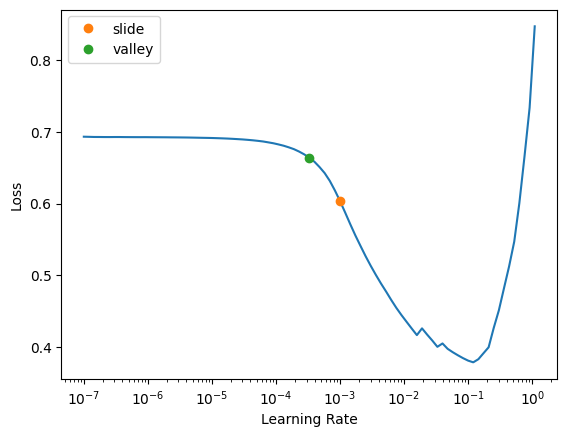

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
(1e-3 + 3.3e-4) / 2

0.000665

In [ ]:
learner.fit_one_cycle(2, 6.5e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.044099,0.044608,0.991066,01:55
1,0.038229,0.038484,0.990611,01:55


In [ ]:
learner.save("multilabel_paper_task_classifier_stage_0")

Path('models/multilabel_paper_task_classifier_stage_0.pth')

In [ ]:
learner.export("models/multilabel_paper_task_classifier_stage_0.pkl")

## Stage 1

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.0002290867705596611, valley=0.00019054606673307717)

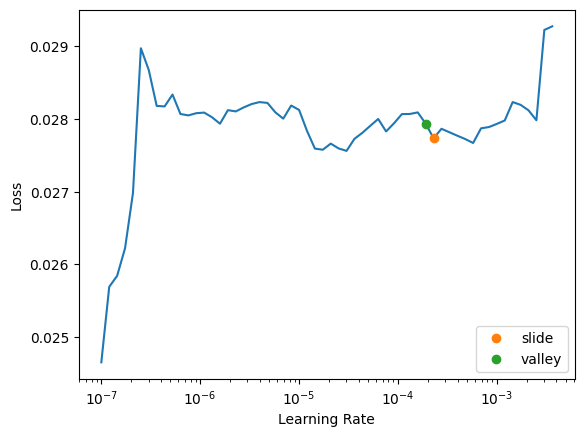

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(3, slice(1.8e-5, 2e-4))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.027041,0.024716,0.993568,02:23
1,0.019465,0.018561,0.994639,02:25
2,0.016922,0.017258,0.995127,02:23


In [ ]:
learner.save("multilabel_paper_task_classifier_stage_1")

Path('models/multilabel_paper_task_classifier_stage_1.pth')

In [ ]:
learner.export("models/multilabel_paper_task_classifier_stage_1.pkl")